In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets

In [14]:
dataset = datasets.fetch_california_housing()

In [16]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train_full, x_test, y_train_full, y_test = train_test_split(dataset.data, dataset.target, random_state=42)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [24]:
y_valid.shape

(3870,)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [29]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])


In [36]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(lr = 1e-3), metrics=['mae'])

In [41]:
model_history = model.fit(x_train,y_train, epochs=25, validation_data=(x_valid,y_valid))

Epoch 1/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3279 - mae: 0.4020 - val_loss: 0.4092 - val_mae: 0.4483
Epoch 2/25
363/363 [==============================] - 1s 3ms/step - loss: 0.3275 - mae: 0.4017 - val_loss: 0.4065 - val_mae: 0.4522
Epoch 3/25
363/363 [==============================] - 1s 3ms/step - loss: 0.3270 - mae: 0.4019 - val_loss: 0.4092 - val_mae: 0.4487
Epoch 4/25
363/363 [==============================] - 1s 4ms/step - loss: 0.3267 - mae: 0.4013 - val_loss: 0.4067 - val_mae: 0.4512
Epoch 5/25
363/363 [==============================] - 1s 4ms/step - loss: 0.3262 - mae: 0.4007 - val_loss: 0.4082 - val_mae: 0.4525
Epoch 6/25
363/363 [==============================] - 1s 3ms/step - loss: 0.3257 - mae: 0.4009 - val_loss: 0.4103 - val_mae: 0.4481
Epoch 7/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3252 - mae: 0.4000 - val_loss: 0.4089 - val_mae: 0.4495
Epoch 8/25
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [42]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3695 - mae: 0.4306


[0.3695217967033386, 0.4305723309516907]

In [43]:
model_history.history

{'loss': [0.3278603255748749,
  0.3274540901184082,
  0.32703468203544617,
  0.32674211263656616,
  0.32622337341308594,
  0.3256574273109436,
  0.32522863149642944,
  0.3248036503791809,
  0.32420262694358826,
  0.3237558901309967,
  0.3234545886516571,
  0.3229943811893463,
  0.3224807679653168,
  0.321855366230011,
  0.3215672969818115,
  0.3212542235851288,
  0.32067930698394775,
  0.3203377425670624,
  0.3194582760334015,
  0.3192281424999237,
  0.31857606768608093,
  0.3181023895740509,
  0.31792783737182617,
  0.3173982501029968,
  0.31690457463264465],
 'mae': [0.4020267128944397,
  0.40166541934013367,
  0.40192708373069763,
  0.40126267075538635,
  0.400709331035614,
  0.40092289447784424,
  0.40001556277275085,
  0.3999043107032776,
  0.39967080950737,
  0.3992030620574951,
  0.3986469507217407,
  0.39878350496292114,
  0.3980911076068878,
  0.3975505232810974,
  0.3975432813167572,
  0.39748111367225647,
  0.3971509337425232,
  0.3966968357563019,
  0.3961828649044037,
  0.

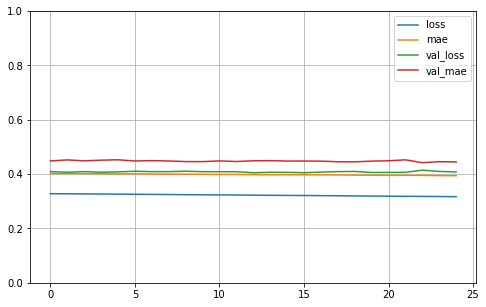

In [47]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
pred = model.predict(x_test[:3])
print(pred)
print(y_test[:3])

[[0.6130015]
 [1.8890285]
 [5.166695 ]]
[0.477   0.458   5.00001]
